# IPython/Jupyter notebook

# Jupyter, IPython ?

- Jupyter was split from IPython in 2015. 
- Jupyter has support for Python, R, Julia and [many others](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages)



## IPython
Ipython is the kernel which can also be used in the console by typing `ipython`.

### Features
- autocompletion
- help system
- IPython magic methods




In [8]:
# Magic method timeit
%timeit range(1000)

The slowest run took 6.49 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 300 ns per loop


In [10]:
# help system
?

In [11]:
range?

In [12]:
# autocompletion
import numpy as np
#press tab after the a
np.a

## Notebook
- Way to mix text, math, code and results in one interactive document.
- Frontend runs in your browser and communicates with kernel over network interface
- Notebooks are divided into cells
- Cells may be executed separately
- Existing cells may be edited, deleted, shifted
- Code cells
   - let you enter code at their top and display the output at their bottom.
   + provide help in tooltips while typing
   + are executed with &lt;Ctrl&gt;+&lt;Enter&gt;
- Markdown cells let you document your code with markup text, including non-ASCII characters: $\omega$, $\phi$, $\kappa$
- Notebooks are stored in JSON format (text files), but can be downloaded as regular Python files and converted to PDF files using nbconvert 

The notebook can be started by using `"ipython notebook"` in console. Or also from start menu.
In the future the command will become `"jupyter notebook"`.

Plots may be displayed inline. If displayed inlinie, then plots are saved as part of the notebook.

## Math rendering is supported


$E(t) = E_0 e^{i\omega t} = E_0(\text{cos}(\omega t) + i \text{sin}(\omega t)) $

# Plotting
- Matplotlib is the default tool for scientific data visualization in python.
- To see what is possible let's check out the [gallery.](http://matplotlib.org/gallery.html)

<IPython.core.display.Javascript object>


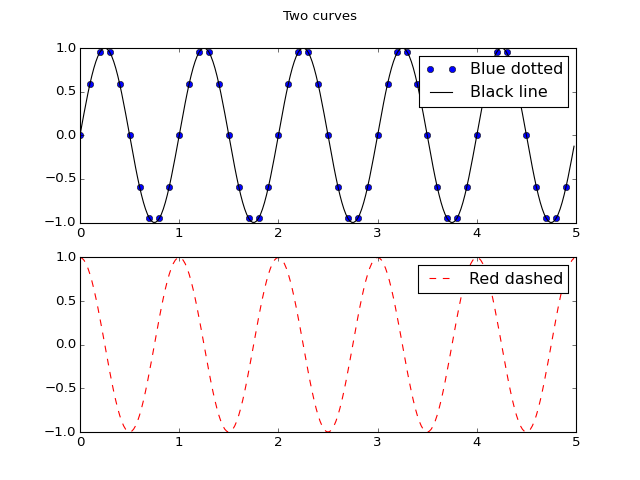

In [15]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

fig = plt.figure(1)
ax1 = plt.subplot(211)
ax1.plot(t1, np.sin(2*np.pi*t1), 'bo', t2, np.sin(2*np.pi*t2), 'k')
ax1.legend(["Blue dotted", "Black line"])

ax2 = plt.subplot(212)
ax2.plot(t2, np.cos(2*np.pi*t2), 'r--')
ax2.legend(["Red dashed"])
fig.suptitle("Two curves")
plt.show()

# Basic Histogram

<IPython.core.display.Javascript object>


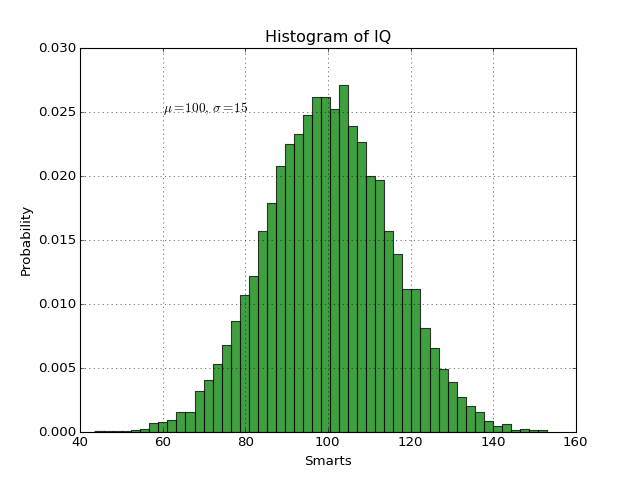

In [14]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

plt.figure()
# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


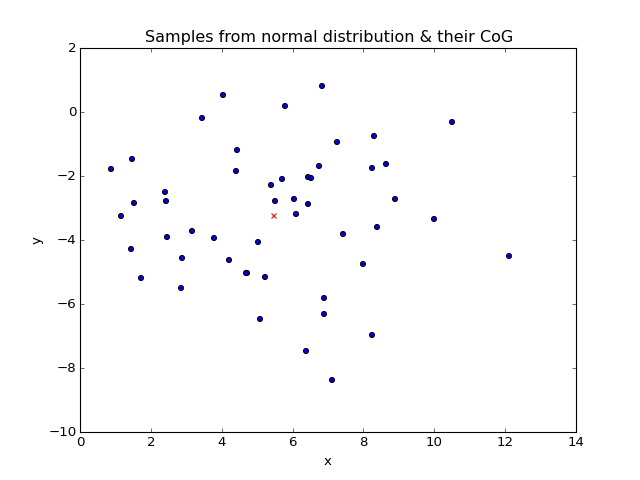

script finished


/home/cpa/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [3]:
# %load lecture6_1.py
import numpy as np
from numpy import random
from matplotlib import pyplot as plt

x_std = 2.52
x_mean = 5.4

# Draw 50 samples from the normal distribution defined by x_std and x_mean:
x = random.randn(50) * x_std + x_mean
y = random.randn(50) * 1.84 - 2.9

# Create a new figure each time this code is run.
plt.figure()

# Create a plot in memory - not rendered yet
plt.scatter(x, y)

# Plot the center of gravity, with 'x'-markers in red.
plt.scatter(x.mean(), y.mean(), c='r', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Samples from normal distribution & their CoG")

# Save the plot to a file, rendering the plot on-demand.
# Opening the SVG-file in a recent browser, you may: zoom and pan.
plt.savefig("samples_cog.svg")

# Show the plot in a GUI-window.
# You may: zoom, pan, display pointer coordinates, edit.
# Interpreter will resume execution only after the window has been closed!
plt.show()

print("script finished")

<IPython.core.display.Javascript object>


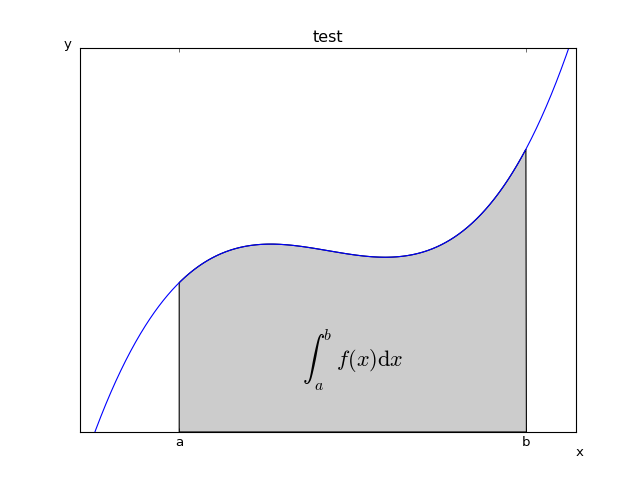

In [17]:
# implement the example graphs/integral from pyx
from matplotlib.patches import Polygon

def func(x):
    return (x-3)*(x-5)*(x-7)+85

plt.figure()
ax = plt.subplot(111)

a, b = 2, 9 # integral area
x = np.arange(0, 10, 0.01)
y = func(x)
ax.plot(x, y, linewidth=1)

# make the shaded region
ix = np.arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

ax.text(0.5 * (a + b), 30,
        "$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
        fontsize=20)

plt.axis([0,10, 0, 180])
plt.figtext(0.9, 0.05, 'x')
plt.figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
plt.title('test')
plt.show()

# Magig methods interacting with files

In [ ]:
%run lecture6_1.py

`%run -i` runs the code interactive meaning we can continue in the IPython notebook

In [ ]:
%run -i lecture6_2_IPython_QtConsole.py
plt.show()

### Display and optionally change the working directory:
`%cd`

### Read a file and paste it into the console;

`%load lecture6_1.py`

### Open a file in a text editor:
`%edit lecture6_1.py`

Parallel/distributed processing
-------------------------------

Needs an IPython parallel computing cluster to be started - e.g. via the Dashboard

In [19]:
from IPython.parallel import Client
rc = Client()
dview = rc[:]

data = range(10)

power10 = dview.map_sync(lambda x: x**10, data )

print(power10)

/home/cpa/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


ImportError: No module named 'parallel'

Custom functions may be executed remotely!

In [ ]:
def func(x):
    return x**3

power3 = dview.map_sync( func, data )

print(power3)

Exercise
--------

Plot the *sine* function, sampled 100 times in the interval $[0;2\pi]$, as a solid, red line